# Required libraries

In [1]:
!date
import warnings
warnings.simplefilter('ignore')

Fri May  8 05:55:49 Asia 2020


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from model_selection.bayes_clustering import GMM_BC

# Generate Toy Data

In [3]:
D = 2
K = 3
np.random.seed(10)
mus = np.random.normal(scale=3, size=(K, D))
covariances = np.empty((K, D, D))
for k in range(K):
    covariances[k] = np.eye(D)

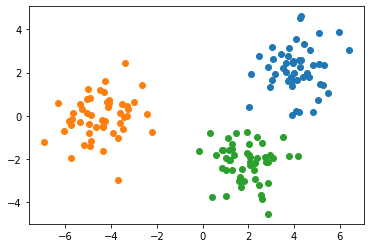

In [4]:
N_samples = [50]*K
plt.figure()
data = []

for mu, cov, n in zip(mus, covariances, N_samples):
    nxy = np.random.multivariate_normal(mu, cov, size=n).astype("float32")
    data.append(nxy)
    plt.scatter(nxy[:,0], nxy[:,1])

data = np.concatenate(data)

# Determine K using this Module

## Model Definition

For now, this module provides the GMM(Gaussian Mixture Model) only.

The model setup is as follows:

**Likelihood**

\begin{align*}
p(x\mid w,\mu,\Sigma) = \sum_{k=1}^{K} w_k\ {\rm Normal}(x\mid\mu_k, \Sigma_k), \quad \text{where} \sum_{k=1}^{K}w_k = 1
\end{align*}

**Initial Priors**
\begin{align*}
\mu_k &\sim_{i.i.d} {\rm Normal}(\mathbb{0}, \mathbb{I}) \quad \text{for}\ k=1,\cdots,K\\
\Sigma_k &\sim_{i.i.d} {\rm LKJCholeskyCov}(\eta=2, sd) \quad \text{where}\ sd \sim {\rm HalfCauchy}(\beta = 2.5)\quad \text{for}\ k=1,\cdots,K\\
w &\sim {\rm Dirichlet}(\alpha = \underbrace{(1,1,\cdots,1)}_{K})\\
\end{align*}

We use NUTS as MCMC sampling method.

In [5]:
# K candidates you want to calculate the Bayes IC
K_cand = np.arange(2, 5+1)

# Create instance and Run MCMC sampling over K_cand 
gmm = GMM_BC(K_cand, n_samples=2000)
gmm.fit(data)

MCMC sampling: K=2


logp = -737.18, ||grad|| = 2.2466: 100%|██████████| 19/19 [00:00<00:00, 552.78it/s]  
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu1, cov1, mu0, cov0, w]
Sampling 2 chains, 19 divergences: 100%|██████████| 6000/6000 [00:32<00:00, 186.35draws/s]
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4912840058854634, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


MCMC sampling: K=3


logp = -743.23, ||grad|| = 1.5034: 100%|██████████| 19/19 [00:00<00:00, 525.29it/s]  
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu2, cov2, mu1, cov1, mu0, cov0, w]
Sampling 2 chains, 0 divergences: 100%|██████████| 6000/6000 [00:44<00:00, 135.17draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


MCMC sampling: K=4


logp = -748.84, ||grad|| = 1.199: 100%|██████████| 16/16 [00:00<00:00, 384.75it/s]  
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu3, cov3, mu2, cov2, mu1, cov1, mu0, cov0, w]
Sampling 2 chains, 8 divergences: 100%|██████████| 6000/6000 [01:55<00:00, 51.99draws/s]
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6297741338273545, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


MCMC sampling: K=5


logp = -754.15, ||grad|| = 1.1086: 100%|██████████| 18/18 [00:00<00:00, 319.98it/s]  
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu4, cov4, mu3, cov3, mu2, cov2, mu1, cov1, mu0, cov0, w]
Sampling 2 chains, 13 divergences: 100%|██████████| 6000/6000 [04:34<00:00, 21.83draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6478740397147897, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [6]:
# calculating the bayesian IC
# as a default, we use WAIC(smaller is better)
gmm.compare(gmm.result)

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
K=3,0,1177.15,16.4854,0,0.66033,24.2057,0,True,deviance
K=4,1,1179.08,16.8952,1.93638,0.253262,24.1053,0.494911,True,deviance
K=5,2,1181.34,17.4566,4.19,0.0864077,20.4275,0.795256,True,deviance
K=2,3,1312.06,36.8883,134.916,1.35461e-21,24.3074,11.7165,True,deviance
